**KNN ALGO**


In [10]:
import numpy as np
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Step A: Load and Prepare Data ---
labels = iris.target_names

iris = load_iris()
X, y = iris.data, iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features (important for distance calculations)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Step B: Define Distance Function ---
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# --- Step C: KNN Class ---
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        # Compute distances to all training points
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Fetch neighbor labels
        k_labels = [self.y_train[i] for i in k_indices]
        # Majority vote
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]

# --- Step D: Train and Evaluate ---
knn = KNN(k=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
accuracy = np.mean(y_pred == y_test)
print(f"KNN Classifier Accuracy (k={knn.k}): {accuracy:.2f}")


KNN Classifier Accuracy (k=5): 1.00


In [13]:
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda i: iris.target_names[i])

# Now you can use head()
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


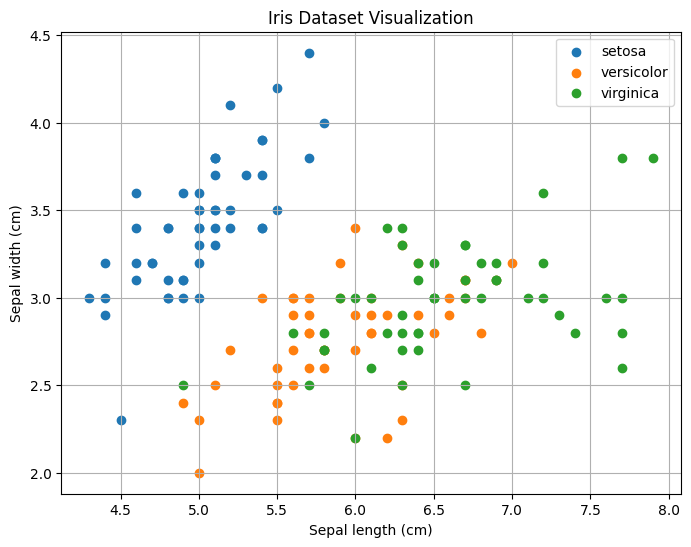

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
labels = iris.target_names

# Select two features for 2D visualization (sepal length & sepal width)
x_axis = X[:, 0]   # Sepal length
y_axis = X[:, 1]   # Sepal width

# Plot
plt.figure(figsize=(8,6))
for i, label in enumerate(labels):
    plt.scatter(x_axis[y == i], y_axis[y == i], label=label)

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Iris Dataset Visualization")
plt.legend()
plt.grid(True)
plt.show()


In [14]:

# --- User Input ---
print("Enter flower measurements:")
sl = float(input("Sepal length (cm): "))
sw = float(input("Sepal width (cm): "))
pl = float(input("Petal length (cm): "))
pw = float(input("Petal width (cm): "))

# Prepare input
user_input = np.array([[sl, sw, pl, pw]])
user_input_scaled = scaler.transform(user_input)

# Prediction
prediction = knn.predict(user_input_scaled)
predicted_class = labels[prediction[0]]

print(f"\n🌸 The predicted Iris species is: {predicted_class}")

Enter flower measurements:

🌸 The predicted Iris species is: setosa
